In [16]:
import IPython.display as ipd
from scipy.io import wavfile
import random
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# 음성 파일 경로를 지정한다
data_dir = 'C:/Users/BINU/.kaggle/'
train_audio_path = data_dir + 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'

# 음성 데이터를 읽어온다
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

In [18]:
# 음성 위치를 200ms~800ms 사이의 값으로 랜덤하게 이동한다
shift_range = random.randint(200,800)
shift = sample_rate + 100 // 1000
shift = random.randint(-shift, shift)
a = -min(0, shift)
b = max(0, shift)
sample_aug = np.pad(samples, (a, b), "constant").astype(np.float16)
sample_aug = sample_aug[:len(sample_aug) - a] if a else sample_aug[b:]

In [20]:
# 제공된 배경 소음 중, 랜덤으로 1초 가량의 소음을 추가한다
max_ratio = random.choice([0.1, 0.5, 1, 1.5])
noise_filenames = [f for f in os.listdir(train_audio_path + '_background_noise_') if f.endswith('.wav')]
noise_filename = noise_filenames[random.randint(0, len(noise_filenames)-1)]
_, noise_samples = wavfile.read(str(train_audio_path) + '_background_noise_/' + noise_filename)
start_idx = random.randint(0, len(noise_samples) - 1 - sample_rate)
noise_samples = noise_samples[start_idx:(start_idx + sample_rate)]
max_ratio = random.choice([0.1, 0.5, 1, 1.5])
sample_aug += max_ratio * random.random() * noise_samples.astype(np.float16)

In [21]:
# 파형의 높이를 스케일링한다
scale = random.uniform(0.75, 1.25)
sample_aug *= scale

# Data Augmentation을 취한 음성 파일을 들어본다
ipd.Audio(sample_aug, rate=sample_rate)

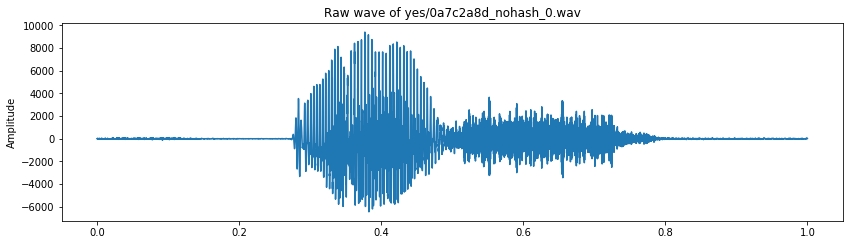

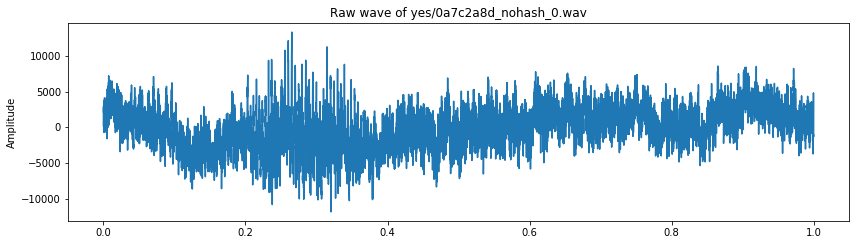

In [29]:
# 원본 음성 파형 시각화
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

# Augmentation된 음성 파형 시각화
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(212)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(sample_aug), sample_rate), sample_aug)